In [216]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import numpy as np
import concurrent.futures
import itertools

In [217]:
url = requests.get('https://m2.ru/moskva/nedvizhimost/kupit-kvartiru/rayon-ramenki/') 
bs_url = BS(url.content, 'html.parser')

In [220]:
flat_links_all = []
for i in range(202):
    url_i = requests.get('https://m2.ru/moskva/nedvizhimost/kupit-kvartiru/rayon-ramenki/?pageNumber='+str(i))
    bs_url_i = BS(url_i.content, 'html.parser')
    flats_i = bs_url_i.findAll('div', class_ = 'ClOfferSnippet__gallery')
    for flat in flats_i:
        flat_links_all.append(flat.find('a').get('href'))

In [240]:
name = []
nearest_subway = []
min_to_subway = []
dist_to_centre = []
price = []
price_for_metr = []
rooms = []
floor = []
all_floor = []
square = []
live_square = []
kitchen_square = []
urls = []

for url in range(len(all_links_for_flats)):

    url = requests.get(all_links_for_flats[url])
    bs_url = BS(url.content, 'html.parser')
    try:        
        name.append(bs_url.find('h1', itemprop = 'name').text.replace('\xa0', "")) 
    except Exception as e:
        name.append('')
    try:        
        nearest_subway.append(bs_url.find('div', class_='OfferRouteCardList').find_all('a', class_='SubwayStation__link')[0].text)
    except Exception as e:
        nearest_subway.append('')
    try:        
        min_to_subway.append(bs_url.find('div', class_='OfferRouteCardList').find_all('div', class_='colors-named-module__secondary___eb0c51 fonts-module__primary___73abfc')[0].text)
    except Exception as e:
        min_to_subway.append('')
    try:        
        dist_to_centre.append(bs_url.find('div', class_ ='ClClickableAddress__links').find_all('span')[-1].text.replace('\xa0', ""))
    except Exception as e:
        dist_to_centre.append('')
    try:        
        price.append(bs_url.find('span', itemprop = 'price').get('content'))
    except Exception as e:
        price.append('')   
    try:        
        price_for_metr.append(bs_url.find('div', class_ = 'OfferCard__price-detail').find_all('div', class_='colors-named-module__secondary___eb0c51 fonts-module__primary-alone___d9c4d7')[0].text.replace('\xa0', ""))
    except Exception as e:
        price_for_metr.append('')
        
        
    try:
        test1 = bs_url.find('div', class_ = 'grid-module__container___ef8782 grid-module__gap___08da08').find_all('a', class_='fonts-module__primary___73abfc DescriptionCell__value')
    except Exception as e:
        rooms.append('')
        floor.append('')
        all_floor.append('') 
        
    try:    
        test2 = bs_url.find('div', class_ = 'grid-module__container___ef8782 grid-module__gap___08da08').find_all('div', class_='fonts-module__primary___73abfc DescriptionCell__value')
    except Exception as e:
        square.append('')
        live_square.append('')
        kitchen_square.append('')
        
    if len(test1) == 2:   
        rooms.append(test1[0].text)
        floor1 = test1[1].text.split(' из ')
        if len(floor1) == 2:
            floor.append(floor1[0])
            all_floor.append(floor1[1])
        else:
            floor.append('')
            all_floor.append('')           
    else:
        rooms.append('')
        floor.append('')
        all_floor.append('')

    if len(test2) == 3:
        square.append(test2[0].text.replace('\xa0', ""))
        live_square.append(test2[1].text.replace('\xa0', ""))
        kitchen_square.append(test2[2].text.replace('\xa0', ""))
    else:
        square.append('')
        live_square.append('')
        kitchen_square.append('')
    

In [324]:
df = pd.DataFrame({'Название': name, 'Ближайшее метро': nearest_subway, 'Расстояние до центра, км': dist_to_centre, 'Цена за квадратный метр, руб': price_for_metr, 'Количество комнат': rooms, 'Этаж': floor,
                   'Количество этажей в доме': all_floor, 'Площадь квартиры, м^2': square, 'Жилая площадь, м^2': live_square, 'Площадь кухни, м^2': kitchen_square, 'Цена, руб': price})
df

Название  \
0         Продажа 3-комнатной квартиры 130м², 11/22этаж   
1          Продажа 4-комнатной квартиры 106м², 3/10этаж   
2     Продажа многокомнатной квартиры 136,9м², 8/14этаж   
3           Продажа 2-комнатной квартиры 75м², 7/10этаж   
4          Продажа 3-комнатной квартиры 118м², 9/18этаж   
...                                                 ...   
3619      Продажа 4-комнатной квартиры 107м², 11/52этаж   
3620     Продажа 1-комнатной квартиры 45,9м², 22/49этаж   
3621     Продажа 3-комнатной квартиры 99,7м², 46/49этаж   
3622    Продажа многокомнатной квартиры 100м², 6/14этаж   
3623        Продажа 3-комнатной квартиры 81м², 6/14этаж   

             Ближайшее метро Расстояние до центра, км  \
0     Ломоносовский проспект        •до центра 8,8 км   
1                Аминьевская       •до центра 11,2 км   
2                    Минская        •до центра 8,8 км   
3                Аминьевская       •до центра 11,2 км   
4                    Раменки        •до центра 9,7 км   
...                      ...                      ...   
3619                 Раменки       •до центра 10,7 км   
3620    Мичуринский проспект       •до центра 11,3 км   
3621    Мичуринский проспект       •до центра 11,3 км   
3622                 Минская        •до центра 8,8 км   
3623                 Минская        •до центра 8,8 км   

     Цена за квадратный метр, руб Количество комнат Этаж  \
0                      423077₽/м²       3-комнатная   11   
1                      646226₽/м²       4-комнатная    3   
2                      745069₽/м²       5-комнатная    8   
3                      440000₽/м²       2-комнатная    7   
4                      507627₽/м²       3-комнатная    9   
...                           ...               ...  ...   
3619                   925234₽/м²       4-комнатная   11   
3620                   545500₽/м²                          
3621                   504800₽/м²                          
3622                   700000₽/м²       5-комнатная    6   
3623                   561111₽/м²       3-комнатная    6   

     Количество этажей в доме Площадь квартиры, м^2 Жилая площадь, м^2  \
0                          22                 130м²               70м²   
1                          10                                            
2                          14               136,9м²             72,7м²   
3                          10                  75м²               35м²   
4                          18                 118м²               75м²   
...                       ...                   ...                ...   
3619                       52                                            
3620                                                                     
3621                                                                     
3622                       14                 100м²               60м²   
3623                       14                  81м²               50м²   

     Площадь кухни, м^2  Цена, руб  
0                  20м²   55000000  
1                         68500000  
2                  12м²  102000000  
3                  21м²   33000000  
4                  20м²   59900000  
...                 ...        ...  
3619                      99000000  
3620                      25038450  
3621                      50328560  
3622               12м²   70000000  
3623               15м²   45450000  

[3624 rows x 11 columns]

In [341]:
df.to_csv('data.csv', index = False)

In [411]:
df1 = pd.read_csv('data.csv')
df1 = df1.replace('', np.nan)
df1.isnull().sum()
df1 = df1.dropna()
df1[df1['Количество комнат'] == 'апартаменты']
df1 = df1.drop(index=[827, 2771])

In [412]:
dist_to_centre = []
price_metr = []
rooms = []
square = []
live_square = []
kitchen_square = []

for i in df1['Расстояние до центра, км']:
    dist_to_centre.append(float(i[11:-3].replace(',','.')))

for i in df1['Цена за квадратный метр, руб']:
    price_metr.append(int(i[:-4]))
    
for i in df1['Площадь квартиры, м^2']:
    square.append(float(i[:-2].replace(',','.')))
    
for i in df1['Жилая площадь, м^2']:
    live_square.append(float(i[:-2].replace(',','.')))   

for i in df1['Площадь кухни, м^2']:
    kitchen_square.append(float(i[:-2].replace(',','.')))  

for i in df1['Количество комнат']:
    rooms.append(int(i[:-10]))
    
df1['Расстояние до центра, км'] = dist_to_centre
df1['Цена за квадратный метр, руб'] = price_metr
df1['Площадь квартиры, м^2'] = square
df1['Жилая площадь, м^2'] = live_square
df1['Площадь кухни, м^2'] = kitchen_square
df1['Количество комнат'] = rooms

In [413]:
df1.dtypes

Название                         object
Ближайшее метро                  object
Расстояние до центра, км        float64
Цена за квадратный метр, руб      int64
Количество комнат                 int64
Этаж                            float64
Количество этажей в доме        float64
Площадь квартиры, м^2           float64
Жилая площадь, м^2              float64
Площадь кухни, м^2              float64
Цена, руб                         int64
dtype: object

In [414]:
df1

Название  \
0         Продажа 3-комнатной квартиры 130м², 11/22этаж   
2     Продажа многокомнатной квартиры 136,9м², 8/14этаж   
3           Продажа 2-комнатной квартиры 75м², 7/10этаж   
4          Продажа 3-комнатной квартиры 118м², 9/18этаж   
5        Продажа 3-комнатной квартиры 117,2м², 7/18этаж   
...                                                 ...   
3616        Продажа 3-комнатной квартиры 81м², 9/14этаж   
3617     Продажа 1-комнатной квартиры 49,3м², 12/13этаж   
3618        Продажа 3-комнатной квартиры 71м², 3/14этаж   
3622    Продажа многокомнатной квартиры 100м², 6/14этаж   
3623        Продажа 3-комнатной квартиры 81м², 6/14этаж   

             Ближайшее метро  Расстояние до центра, км  \
0     Ломоносовский проспект                       8.8   
2                    Минская                       8.8   
3                Аминьевская                      11.2   
4                    Раменки                       9.7   
5                    Раменки                       9.7   
...                      ...                       ...   
3616                 Минская                       8.8   
3617                 Минская                       8.9   
3618                 Минская                       8.9   
3622                 Минская                       8.8   
3623                 Минская                       8.8   

      Цена за квадратный метр, руб  Количество комнат  Этаж  \
0                           423077                  3  11.0   
2                           745069                  5   8.0   
3                           440000                  2   7.0   
4                           507627                  3   9.0   
5                           580205                  3   7.0   
...                            ...                ...   ...   
3616                        524691                  3   9.0   
3617                        637120                  1  12.0   
3618                        549296                  3   3.0   
3622                        700000                  5   6.0   
3623                        561111                  3   6.0   

      Количество этажей в доме  Площадь квартиры, м^2  Жилая площадь, м^2  \
0                         22.0                  130.0                70.0   
2                         14.0                  136.9                72.7   
3                         10.0                   75.0                35.0   
4                         18.0                  118.0                75.0   
5                         18.0                  117.2                58.6   
...                        ...                    ...                 ...   
3616                      14.0                   81.0                40.0   
3617                      13.0                   49.3                12.9   
3618                      14.0                   71.0                52.0   
3622                      14.0                  100.0                60.0   
3623                      14.0                   81.0                50.0   

      Площадь кухни, м^2  Цена, руб  
0                   20.0   55000000  
2                   12.0  102000000  
3                   21.0   33000000  
4                   20.0   59900000  
5                   16.8   68000000  
...                  ...        ...  
3616                16.0   42500000  
3617                20.7   31410000  
3618                12.0   39000000  
3622                12.0   70000000  
3623                15.0   45450000  

[1666 rows x 11 columns]

In [410]:
df1.to_csv('data1.csv', index = False)

In [437]:
df1.corr()

Расстояние до центра, км  \
Расстояние до центра, км                      1.000000   
Цена за квадратный метр, руб                 -0.352456   
Количество комнат                            -0.115847   
Этаж                                          0.201991   
Количество этажей в доме                      0.428461   
Площадь квартиры, м^2                        -0.142345   
Жилая площадь, м^2                           -0.200630   
Площадь кухни, м^2                            0.101786   
Цена, руб                                    -0.246842   

                              Цена за квадратный метр, руб  Количество комнат  \
Расстояние до центра, км                         -0.352456          -0.115847   
Цена за квадратный метр, руб                      1.000000           0.244541   
Количество комнат                                 0.244541           1.000000   
Этаж                                             -0.145815          -0.073199   
Количество этажей в доме                         -0.279285          -0.198660   
Площадь квартиры, м^2                             0.405581           0.790896   
Жилая площадь, м^2                                0.385511           0.772584   
Площадь кухни, м^2                                0.288326           0.315566   
Цена, руб                                         0.744739           0.578301   

                                  Этаж  Количество этажей в доме  \
Расстояние до центра, км      0.201991                  0.428461   
Цена за квадратный метр, руб -0.145815                 -0.279285   
Количество комнат            -0.073199                 -0.198660   
Этаж                          1.000000                  0.375063   
Количество этажей в доме      0.375063                  1.000000   
Площадь квартиры, м^2        -0.054999                 -0.208412   
Жилая площадь, м^2           -0.088624                 -0.201613   
Площадь кухни, м^2            0.103565                 -0.101275   
Цена, руб                    -0.142820                 -0.259192   

                              Площадь квартиры, м^2  Жилая площадь, м^2  \
Расстояние до центра, км                  -0.142345           -0.200630   
Цена за квадратный метр, руб               0.405581            0.385511   
Количество комнат                          0.790896            0.772584   
Этаж                                      -0.054999           -0.088624   
Количество этажей в доме                  -0.208412           -0.201613   
Площадь квартиры, м^2                      1.000000            0.930427   
Жилая площадь, м^2                         0.930427            1.000000   
Площадь кухни, м^2                         0.478948            0.297048   
Цена, руб                                  0.821134            0.786084   

                              Площадь кухни, м^2  Цена, руб  
Расстояние до центра, км                0.101786  -0.246842  
Цена за квадратный метр, руб            0.288326   0.744739  
Количество комнат                       0.315566   0.578301  
Этаж                                    0.103565  -0.142820  
Количество этажей в доме               -0.101275  -0.259192  
Площадь квартиры, м^2                   0.478948   0.821134  
Жилая площадь, м^2                      0.297048   0.786084  
Площадь кухни, м^2                      1.000000   0.400553  
Цена, руб                               0.400553   1.000000

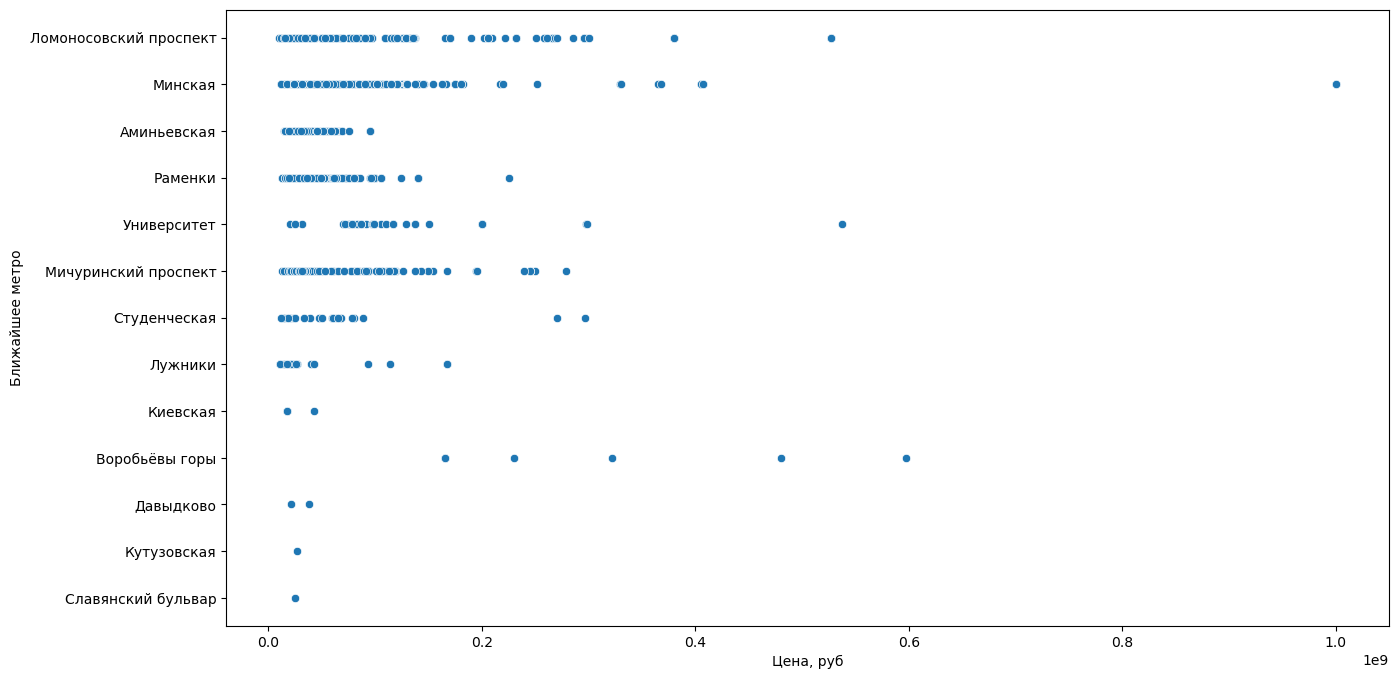

In [421]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
ax=sns.scatterplot(x='Цена, руб', y='Ближайшее метро', data=df1)

plt.show()

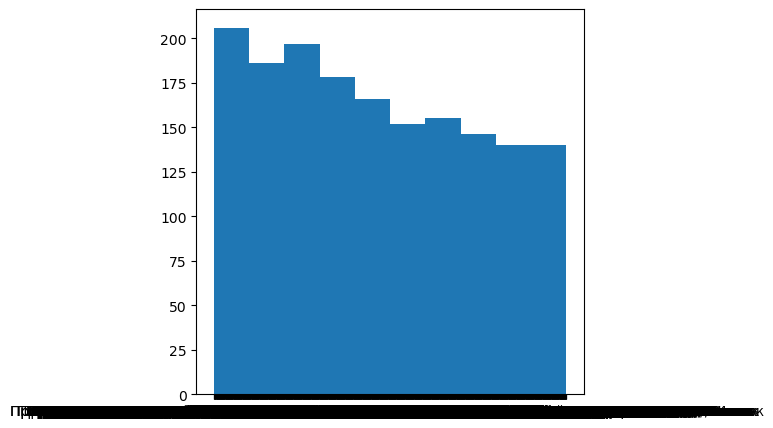

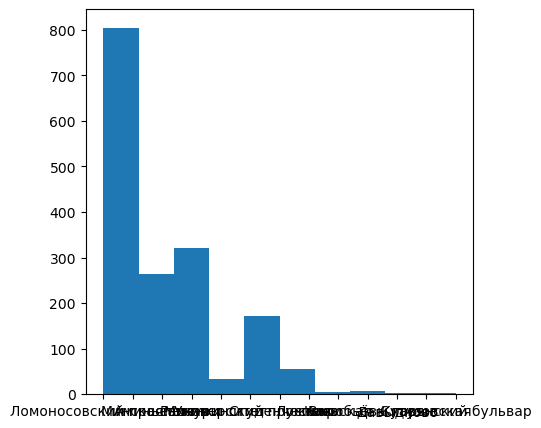

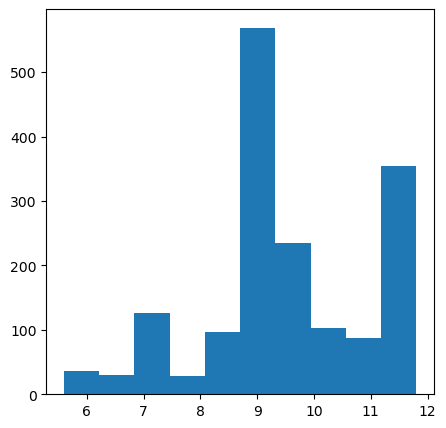

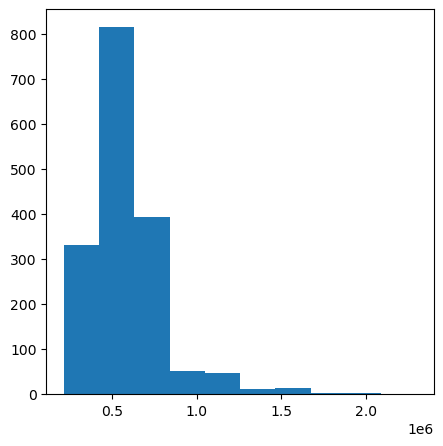

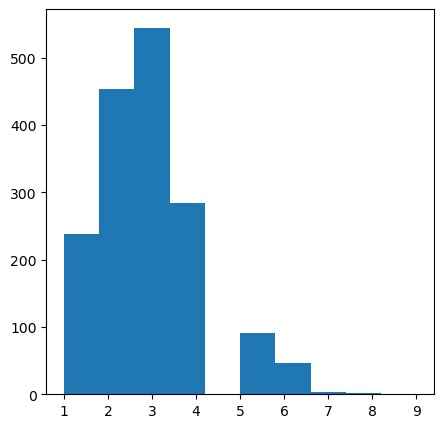

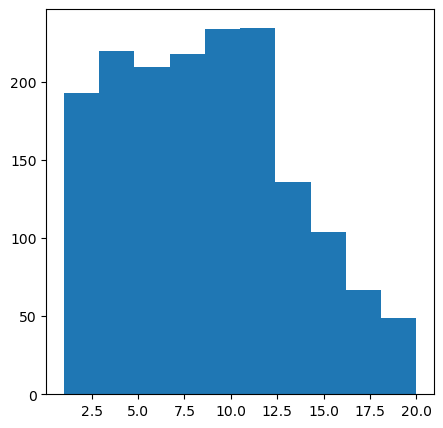

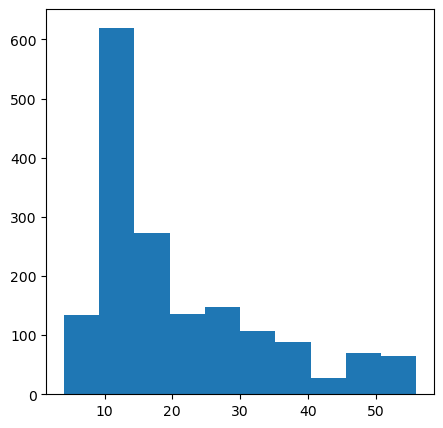

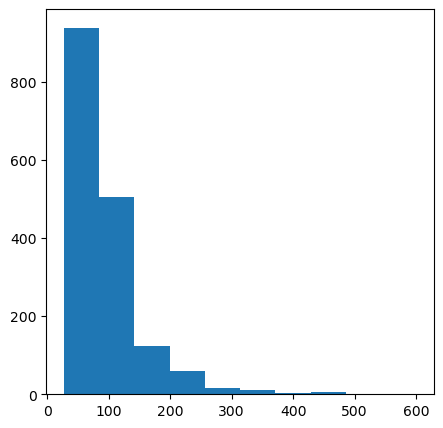

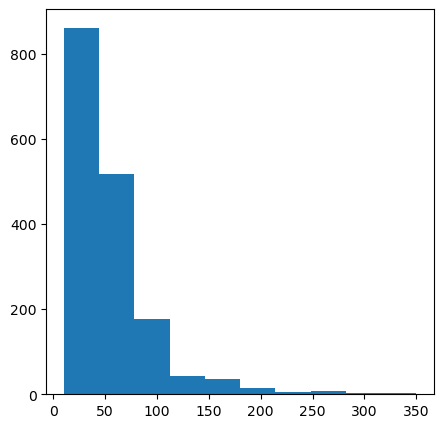

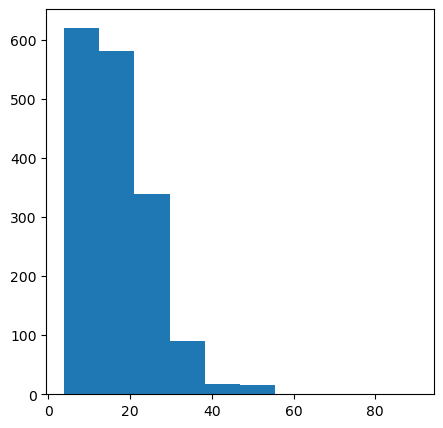

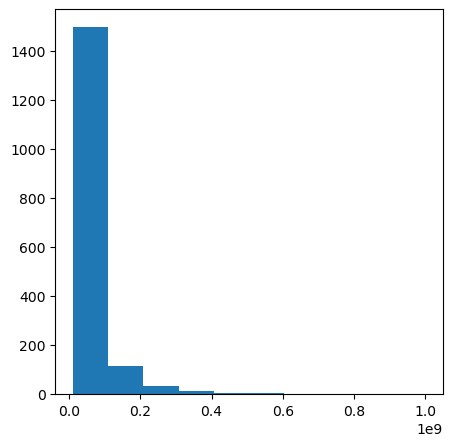

In [429]:
for i in df1.columns:
    plt.figure(figsize = (5,5))
    plt.hist(df1[i]);